In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11adbcf28>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
#inspect the Measurement data 

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#sample dates 

start_date = dt.date(2016,1,1)
end_date = dt.date(2017,1,1)

In [14]:
#checking the format on dates

dates_format = session.query(Measurement.date).all()
for row in dates_format:
    print (row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2016-12-17',)
('2016-12-18',)
('2016-12-19',)
('2016-12-20',)
('2016-12-21',)
('2016-12-22',)
('2016-12-23',)
('2016-12-24',)
('2016-12-25',)
('2016-12-26',)
('2016-12-27',)
('2016-12-28',)
('2016-12-29',)
('2016-12-30',)
('2016-12-31',)
('2017-01-01',)
('2017-01-02',)
('2017-01-03',)
('2017-01-04',)
('2017-01-05',)
('2017-01-06',)
('2017-01-07',)
('2017-01-08',)
('2017-01-09',)
('2017-01-10',)
('2017-01-11',)
('2017-01-12',)
('2017-01-13',)
('2017-01-14',)
('2017-01-15',)
('2017-01-16',)
('2017-01-17',)
('2017-01-18',)
('2017-01-19',)
('2017-01-20',)
('2017-01-21',)
('2017-01-22',)
('2017-01-23',)
('2017-01-24',)
('2017-01-25',)
('2017-01-26',)
('2017-01-27',)
('2017-01-28',)
('2017-01-29',)
('2017-01-30',)
('2017-01-31',)
('2017-02-01',)
('2017-02-02',)
('2017-02-03',)
('2017-02-04',)
('2017-02-05',)
('2017-02-06',)
('2017-02-07',)
('2017-02-08',)
('2017-02-09',)
('2017-02-10',)
('2017-02-11',)
('2017-02-12',)
('2017-02-13',)
('2017-02-14',)
('2017-02-15',)
('2017-02-16',)
('2017-0

('2012-12-01',)
('2012-12-02',)
('2012-12-03',)
('2012-12-04',)
('2012-12-05',)
('2012-12-06',)
('2012-12-07',)
('2012-12-08',)
('2012-12-09',)
('2012-12-10',)
('2012-12-11',)
('2012-12-12',)
('2012-12-13',)
('2012-12-14',)
('2012-12-15',)
('2012-12-16',)
('2012-12-17',)
('2012-12-18',)
('2012-12-19',)
('2012-12-20',)
('2012-12-21',)
('2012-12-22',)
('2012-12-23',)
('2012-12-24',)
('2012-12-25',)
('2012-12-26',)
('2012-12-27',)
('2012-12-28',)
('2012-12-29',)
('2012-12-30',)
('2012-12-31',)
('2013-01-01',)
('2013-01-02',)
('2013-01-03',)
('2013-01-04',)
('2013-01-05',)
('2013-01-06',)
('2013-01-07',)
('2013-01-08',)
('2013-01-09',)
('2013-01-10',)
('2013-01-11',)
('2013-01-13',)
('2013-01-14',)
('2013-01-15',)
('2013-01-16',)
('2013-01-17',)
('2013-01-18',)
('2013-01-19',)
('2013-01-20',)
('2013-01-21',)
('2013-01-22',)
('2013-01-23',)
('2013-01-24',)
('2013-01-25',)
('2013-01-26',)
('2013-01-27',)
('2013-01-28',)
('2013-01-29',)
('2013-01-30',)
('2013-01-31',)
('2013-02-01',)
('2013-0

('2012-09-24',)
('2012-09-25',)
('2012-09-26',)
('2012-09-27',)
('2012-09-28',)
('2012-09-29',)
('2012-10-01',)
('2012-10-02',)
('2012-10-03',)
('2012-10-04',)
('2012-10-05',)
('2012-10-06',)
('2012-10-07',)
('2012-10-08',)
('2012-10-09',)
('2012-10-10',)
('2012-10-11',)
('2012-10-12',)
('2012-10-14',)
('2012-10-15',)
('2012-10-16',)
('2012-10-17',)
('2012-10-18',)
('2012-10-19',)
('2012-10-20',)
('2012-10-22',)
('2012-10-23',)
('2012-10-24',)
('2012-10-25',)
('2012-10-26',)
('2012-10-27',)
('2012-10-29',)
('2012-10-30',)
('2012-10-31',)
('2012-11-01',)
('2012-11-02',)
('2012-11-03',)
('2012-11-04',)
('2012-11-05',)
('2012-11-06',)
('2012-11-07',)
('2012-11-08',)
('2012-11-09',)
('2012-11-11',)
('2012-11-12',)
('2012-11-13',)
('2012-11-14',)
('2012-11-15',)
('2012-11-16',)
('2012-11-17',)
('2012-11-18',)
('2012-11-19',)
('2012-11-20',)
('2012-11-21',)
('2012-11-24',)
('2012-11-27',)
('2012-11-28',)
('2012-11-29',)
('2012-11-30',)
('2012-12-01',)
('2012-12-03',)
('2012-12-04',)
('2012-1

('2010-12-10',)
('2010-12-13',)
('2010-12-14',)
('2010-12-15',)
('2010-12-16',)
('2010-12-17',)
('2011-01-04',)
('2011-01-05',)
('2011-01-06',)
('2011-01-07',)
('2011-01-10',)
('2011-01-11',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-07',)
('2011-02-08',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-14',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-07',)
('2011-03-08',)
('2011-03-09',)
('2011-03-10',)
('2011-03-14',)
('2011-03-15',)
('2011-03-16',)
('2011-03-30',)
('2011-03-31',)
('2011-04-01',)
('2011-04-04',)
('2011-04-05',)
('2011-04-06',)
('2011-04-07',)
('2011-04-11',)
('2011-04-12',)
('2011-04-13',)
('2011-04-14',)
('2011-04-15',)
('2011-0

('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-29',)
('2011-01-30',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-05',)
('2011-02-06',)
('2011-02-07',)
('2011-02-08',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-12',)
('2011-02-13',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-02-19',)
('2011-02-20',)
('2011-02-21',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-26',)
('2011-02-27',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-03',)
('2011-03-04',)
('2011-03-05',)
('2011-03-06',)
('2011-03-07',)
('2011-03-08',)
('2011-03-09',)
('2011-03-10',)
('2011-03-11',)
('2011-03-12',)
('2011-03-13',)
('2011-03-14',)
('2011-03-15',)
('2011-03-16',)
('2011-03-17',)
('2011-03-18',)
('2011-03-19',)
('2011-03-20',)
('2011-03-21',)
('2011-03-22',)
('2011-03-23',)
('2011-03-24',)
('2011-03-25',)
('2011-03-26',)
('2011-03-27',)
('2011-03-29',)
('2011-0

('2014-08-27',)
('2014-08-28',)
('2014-08-29',)
('2014-08-30',)
('2014-08-31',)
('2014-09-01',)
('2014-09-02',)
('2014-09-03',)
('2014-09-04',)
('2014-09-05',)
('2014-09-06',)
('2014-09-07',)
('2014-09-08',)
('2014-09-09',)
('2014-09-10',)
('2014-09-11',)
('2014-09-12',)
('2014-09-13',)
('2014-09-14',)
('2014-09-15',)
('2014-09-16',)
('2014-09-17',)
('2014-09-18',)
('2014-09-21',)
('2014-09-24',)
('2014-09-25',)
('2014-09-26',)
('2014-09-27',)
('2014-09-28',)
('2014-09-29',)
('2014-09-30',)
('2014-10-01',)
('2014-10-02',)
('2014-10-03',)
('2014-10-04',)
('2014-10-05',)
('2014-10-06',)
('2014-10-07',)
('2014-10-08',)
('2014-10-10',)
('2014-10-11',)
('2014-10-12',)
('2014-10-13',)
('2014-10-14',)
('2014-10-15',)
('2014-10-16',)
('2014-10-17',)
('2014-10-18',)
('2014-10-19',)
('2014-10-20',)
('2014-10-21',)
('2014-10-22',)
('2014-10-23',)
('2014-10-24',)
('2014-10-27',)
('2014-10-28',)
('2014-10-29',)
('2014-10-30',)
('2014-10-31',)
('2014-11-01',)
('2014-11-02',)
('2014-11-03',)
('2014-1

('2013-06-22',)
('2013-06-23',)
('2013-06-24',)
('2013-06-25',)
('2013-06-26',)
('2013-06-27',)
('2013-06-28',)
('2013-06-29',)
('2013-06-30',)
('2013-07-01',)
('2013-07-02',)
('2013-07-03',)
('2013-07-04',)
('2013-07-05',)
('2013-07-06',)
('2013-07-07',)
('2013-07-08',)
('2013-07-09',)
('2013-07-10',)
('2013-07-11',)
('2013-07-12',)
('2013-07-13',)
('2013-07-14',)
('2013-07-15',)
('2013-07-16',)
('2013-07-17',)
('2013-07-18',)
('2013-07-19',)
('2013-07-20',)
('2013-07-21',)
('2013-07-22',)
('2013-07-23',)
('2013-07-24',)
('2013-07-25',)
('2013-07-26',)
('2013-07-27',)
('2013-07-28',)
('2013-07-29',)
('2013-07-30',)
('2013-07-31',)
('2013-08-01',)
('2013-08-02',)
('2013-08-03',)
('2013-08-04',)
('2013-08-05',)
('2013-08-06',)
('2013-08-07',)
('2013-08-08',)
('2013-08-09',)
('2013-08-10',)
('2013-08-11',)
('2013-08-12',)
('2013-08-13',)
('2013-08-14',)
('2013-08-15',)
('2013-08-16',)
('2013-08-17',)
('2013-08-18',)
('2013-08-19',)
('2013-08-20',)
('2013-08-21',)
('2013-08-22',)
('2013-0

('2017-03-02',)
('2017-03-03',)
('2017-03-04',)
('2017-03-05',)
('2017-03-06',)
('2017-03-07',)
('2017-03-08',)
('2017-03-09',)
('2017-03-10',)
('2017-03-11',)
('2017-03-12',)
('2017-03-13',)
('2017-03-14',)
('2017-03-15',)
('2017-03-16',)
('2017-03-17',)
('2017-03-18',)
('2017-03-19',)
('2017-03-20',)
('2017-03-21',)
('2017-03-22',)
('2017-03-23',)
('2017-03-24',)
('2017-03-25',)
('2017-03-26',)
('2017-03-27',)
('2017-03-28',)
('2017-03-29',)
('2017-03-30',)
('2017-03-31',)
('2017-04-01',)
('2017-04-02',)
('2017-04-03',)
('2017-04-04',)
('2017-04-05',)
('2017-04-06',)
('2017-04-07',)
('2017-04-08',)
('2017-04-09',)
('2017-04-10',)
('2017-04-11',)
('2017-04-12',)
('2017-04-13',)
('2017-04-14',)
('2017-04-15',)
('2017-04-16',)
('2017-04-17',)
('2017-04-18',)
('2017-04-19',)
('2017-04-20',)
('2017-04-21',)
('2017-04-22',)
('2017-04-23',)
('2017-04-24',)
('2017-04-25',)
('2017-04-26',)
('2017-04-27',)
('2017-04-28',)
('2017-04-29',)
('2017-04-30',)
('2017-05-01',)
('2017-05-02',)
('2017-0

('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-05',)
('2011-02-06',)
('2011-02-07',)
('2011-02-08',)
('2011-02-10',)
('2011-02-11',)
('2011-02-12',)
('2011-02-13',)
('2011-02-14',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-02-19',)
('2011-02-20',)
('2011-02-21',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-26',)
('2011-02-27',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-03',)
('2011-03-04',)
('2011-03-05',)
('2011-03-06',)
('2011-03-07',)
('2011-03-08',)
('2011-03-09',)
('2011-03-10',)
('2011-03-11',)
('2011-03-12',)
('2011-03-13',)
('2011-03-14',)
('2011-03-15',)
('2011-03-16',)
('2011-03-17',)
('2011-03-18',)
('2011-03-19',)
('2011-03-20',)
('2011-03-21',)
('2011-03-22',)
('2011-03-23',)
('2011-03-24',)
('2011-03-25',)
('2011-03-26',)
('2011-03-27',)
('2011-03-28',)
('2011-03-29',)
('2011-03-30',)
('2011-03-31',)
('2011-04-01',)
('2011-04-02',)
('2011-04-03',)
('2011-0

('2014-04-18',)
('2014-04-19',)
('2014-04-20',)
('2014-04-21',)
('2014-04-22',)
('2014-04-23',)
('2014-04-24',)
('2014-04-25',)
('2014-04-26',)
('2014-04-27',)
('2014-04-28',)
('2014-04-29',)
('2014-04-30',)
('2014-05-01',)
('2014-05-02',)
('2014-05-03',)
('2014-05-04',)
('2014-05-05',)
('2014-05-06',)
('2014-05-07',)
('2014-05-08',)
('2014-05-09',)
('2014-05-11',)
('2014-05-12',)
('2014-05-13',)
('2014-05-14',)
('2014-05-15',)
('2014-05-16',)
('2014-05-17',)
('2014-05-18',)
('2014-05-19',)
('2014-05-20',)
('2014-05-21',)
('2014-05-22',)
('2014-05-23',)
('2014-05-24',)
('2014-05-25',)
('2014-05-26',)
('2014-05-27',)
('2014-05-28',)
('2014-05-29',)
('2014-05-30',)
('2014-06-01',)
('2014-06-02',)
('2014-06-03',)
('2014-06-04',)
('2014-06-05',)
('2014-06-06',)
('2014-06-07',)
('2014-06-08',)
('2014-06-09',)
('2014-06-10',)
('2014-06-11',)
('2014-06-12',)
('2014-06-13',)
('2014-06-14',)
('2014-06-15',)
('2014-06-16',)
('2014-06-17',)
('2014-06-18',)
('2014-06-19',)
('2014-06-20',)
('2014-0

In [15]:
#max date in the sql file 

max_dates = session.query(func.max(func.strftime("%Y-%m-%d",Measurement.date))).all()
max_dates

[('2017-08-23')]

In [16]:
#find data from August 23, 2016 to August 23, 2017
one_year_data = session.query(func.strftime("%Y-%m-%d",Measurement.date),Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d",Measurement.date)>= dt.date(2016,8,23)).all()

one_year_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
#convert to dataframe
precipitation_data = pd.DataFrame (one_year_data, columns = ["date","Precipitation"])
#reset the index
precipitation_data.set_index("date", inplace = True )
#fillinig the NaN to 0 
clean_precipitation_data=precipitation_data.dropna() 
#clean data Sheet 
clean_precipitation_data

,Precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [18]:
clean_precipitation_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


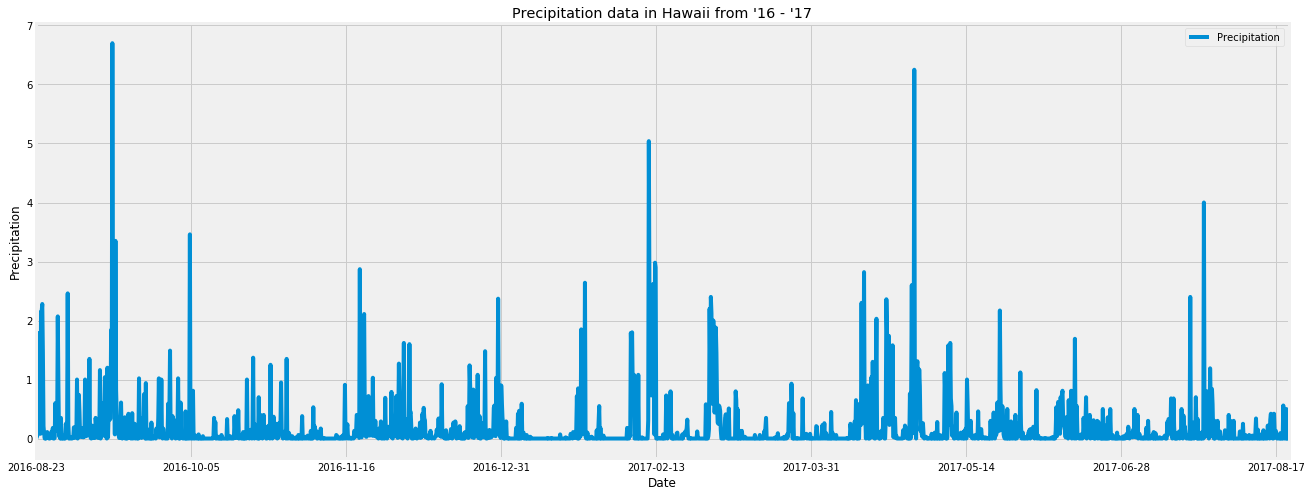

In [19]:
#sort the dates in order 
clean_precipitation_data=clean_precipitation_data.sort_values("date")
clean_precipitation_data.plot(figsize=(20,8))
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation data in Hawaii from '16 - '17")
plt.show()

In [20]:
# Inspecting the station data
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count()
stations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

Stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()
for row in Stations:
    print(f"Station: {row[0]}\tCount: {row[1]}")

Station: USC00519281	Count: 2772
Station: USC00519397	Count: 2724
Station: USC00513117	Count: 2709
Station: USC00519523	Count: 2669
Station: USC00516128	Count: 2612
Station: USC00514830	Count: 2202
Station: USC00511918	Count: 1979
Station: USC00517948	Count: 1372
Station: USC00518838	Count: 511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station = 'USC00519281'
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
avtive_station_temps = session.query(*sel).\
    filter(Measurement.station == active_station).all()
print(f"Lowest Temperature: {avtive_station_temps[0][0]} Fahrenheit")
print(f"Highest Temperature: {avtive_station_temps[0][1]} Fahrenheit")
print(f"Average Temperature: {round(avtive_station_temps[0][2], 2)} Fahrenheit")

Lowest Temperature: 54.0 Fahrenheit
Highest Temperature: 85.0 Fahrenheit
Average Temperature: 71.66 Fahrenheit


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

#save as a data frame
yearly_temp_df = pd.DataFrame(yearly_temps, columns = ['date', 'temperature'])


#set index to date 
yearly_temp_df.set_index('date',inplace = True )

yearly_temp_df.head()

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


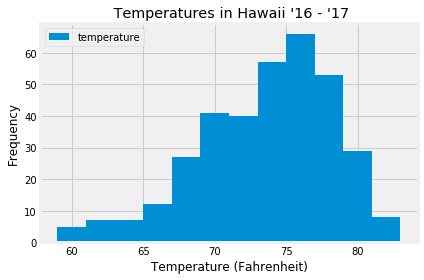

In [26]:
#plot histogram

yearly_temp_df.plot.hist(bins = 12)

#set labels
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.title(" Temperatures in Hawaii '16 - '17")

#plot
plt.tight_layout()
plt.show()

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip =calc_temps('2016-10-16', '2017-10-16')

print(f"Lowest Temperature: {my_trip[0][0]} Fahrenheit")
print(f"Average Temperature: {round(my_trip[0][1], 2)} Fahrenheit")
print(f"Highest Temperature: {my_trip[0][2]} Fahrenheit")

Lowest Temperature: 58.0 Fahrenheit
Average Temperature: 74.0 Fahrenheit
Highest Temperature: 87.0 Fahrenheit


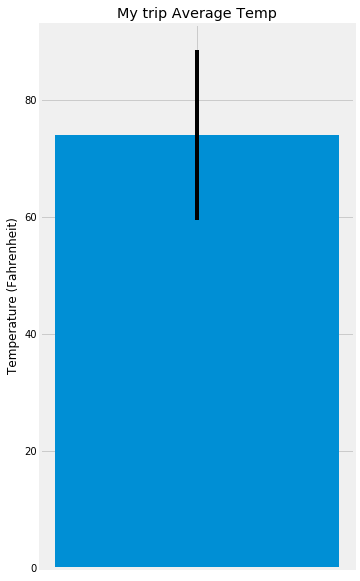

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lt_to_ht = my_trip[0][2] - my_trip[0][0]
avg_temp = my_trip[0][1]

#plot figure
fig, ax = plt.subplots(figsize = (5, 10))

ax.bar(1, avg_temp, yerr = lt_to_ht/2, width = 0.4)

#set labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_title('My trip Average Temp')
ax.set_ylabel('Temperature (Fahrenheit)')


#show figure

plt.show()


In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel= [Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation, func.avg(Measurement.prcp)]

yearly_rainfall = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
yearly_rainfall_df = pd.DataFrame(yearly_rainfall, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
                                                              'Elevation', 'Avg. Precipitation (inches)'])

yearly_rainfall_df.set_index('Station',inplace = True )

yearly_rainfall_df

,Name,Latitude,Longitude,Elevation,Avg. Precipitation (inches)
Station,,,,,
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.450640
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.198949
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.141429
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.125434
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.121051
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.076500
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.044819


## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

my_dates = ["10-01", "10-02", "10-03", "10-04", "10-05", "10-06", "10-07", "10-08", "10-09", "10-10", "10-11","10-12", "10-13", "10-14", "10-15","10-16"]




In [33]:

# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normal = []

for days in my_dates:
    day = {}
    day['Date'] = f"2017-{days}"
    daily_norm = daily_normals(days)
    day['Min'] = daily_norm[0][0]
    day['Avg'] = daily_norm[0][1]
    day['Max'] = daily_norm[0][2]
    daily_normal.append(day)
    
daily_normal


[{'Date': '2017-10-01', 'Min': 69.0, 'Avg': 75.22916666666667, 'Max': 80.0},
 {'Date': '2017-10-02', 'Min': 70.0, 'Avg': 76.26, 'Max': 83.0},
 {'Date': '2017-10-03', 'Min': 66.0, 'Avg': 76.73076923076923, 'Max': 84.0},
 {'Date': '2017-10-04', 'Min': 67.0, 'Avg': 75.86274509803921, 'Max': 82.0},
 {'Date': '2017-10-05', 'Min': 67.0, 'Avg': 76.16666666666667, 'Max': 84.0},
 {'Date': '2017-10-06', 'Min': 70.0, 'Avg': 75.42, 'Max': 81.0},
 {'Date': '2017-10-07', 'Min': 68.0, 'Avg': 75.6078431372549, 'Max': 81.0},
 {'Date': '2017-10-08', 'Min': 66.0, 'Avg': 76.3265306122449, 'Max': 86.0},
 {'Date': '2017-10-09', 'Min': 69.0, 'Avg': 76.11363636363636, 'Max': 84.0},
 {'Date': '2017-10-10', 'Min': 69.0, 'Avg': 75.85416666666667, 'Max': 83.0},
 {'Date': '2017-10-11', 'Min': 69.0, 'Avg': 76.57142857142857, 'Max': 84.0},
 {'Date': '2017-10-12', 'Min': 65.0, 'Avg': 75.75510204081633, 'Max': 82.0},
 {'Date': '2017-10-13', 'Min': 65.0, 'Avg': 75.98039215686275, 'Max': 84.0},
 {'Date': '2017-10-14', '

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#load into a data frame
trip_dates_df = pd.DataFrame(daily_normal)

#set index
trip_dates_df.set_index('Date', inplace = True)

#display
trip_dates_df

,Avg,Max,Min
Date,,,
2017-10-01,75.229167,80.0,69.0
2017-10-02,76.260000,83.0,70.0
2017-10-03,76.730769,84.0,66.0
2017-10-04,75.862745,82.0,67.0
2017-10-05,76.166667,84.0,67.0
2017-10-06,75.420000,81.0,70.0
2017-10-07,75.607843,81.0,68.0
2017-10-08,76.326531,86.0,66.0
2017-10-09,76.113636,84.0,69.0


Text(0.5, 1.0, 'Daily Temperatures for Hawaii')

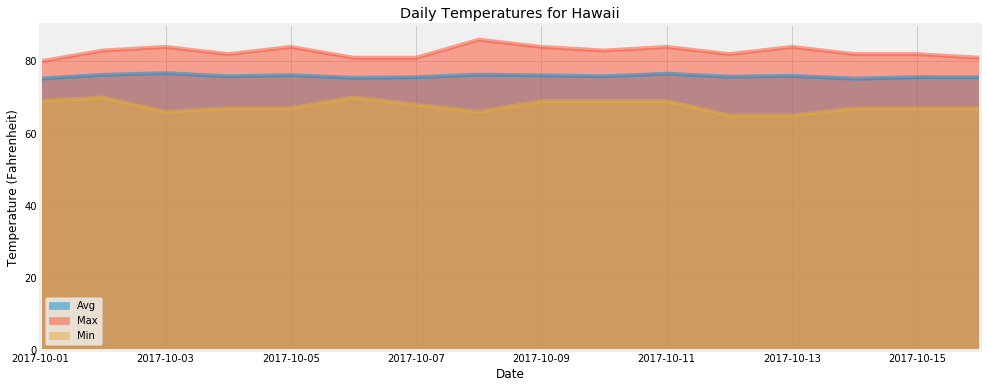

In [36]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dates_df.plot.area(stacked=False, figsize=(15,6))
#set labels
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Daily Temperatures for Hawaii')